[2.4684068094579303, 3.3357049741610365, 4.783279375373182, 6.279587332087612, 8.080776465019053, 10.251163032292936, 12.936063506609896, 16.276861327786712, 20.45482961834598, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.8244073070191, 63.79612654485427, 80.07737014308985, 100.5129892205125, 126.16331847536823, 158.35920648258823, 198.7710796761195, 249.495615421267]


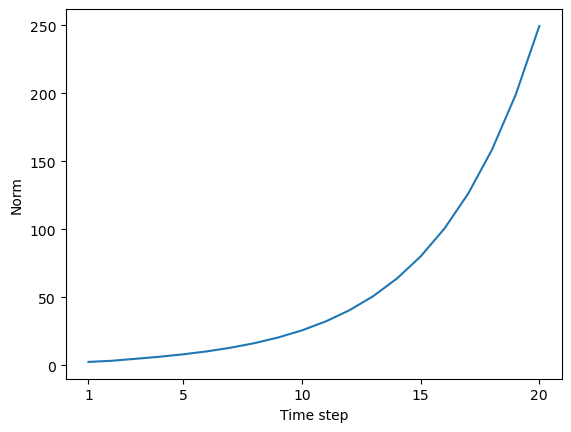

In [2]:
# %load rnn_gradient_graph.py
import numpy as np
import matplotlib.pyplot as plt


N = 2   # 미니배치 크기, 샘플 개수
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H)) #초기 기울기를 모두 1로 설정

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

Wh = np.random.randn(H, H)  #은닉 상태 가중치 행렬을 랜덤 값으로 초기화
#Wh = np.random.randn(H, H) * 0.5   #초기값을 작은 값으로 설정(* 0.5)할 경우 기울기 소실이 덜 발생할 수 있습니다.

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)   #dh, Wh.T 곱하기
    norm = np.sqrt(np.sum(dh**2)) / N   #norm계산
    norm_list.append(norm)  #norm 저장

print(norm_list)    #리스트에 저장된 norm을 출력

# 그래프 그리기
"""
그래프: 시간 축(t)에 따른 기울기 크기(norm)의 변화를 시각화하여, 기울기 소실 여부를 확인합니다.
"""
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('Time step')
plt.ylabel('Norm')
plt.show()
"""
출력 및 해석
    출력된 norm_list는 시간이 지남에 따라 기울기(dh)의 크기가 어떻게 변화하는지를 보여줍니다.
    그래프를 통해 기울기가 시간이 지날수록 급격히 줄어드는 (혹은 커지는) 경향을 확인할 수 있습니다.
    만약 Wh의 값을 더 작게 설정(* 0.5)하면 기울기가 소실되는 속도가 느려질 수 있습니다. 이는 초기화 전략이 RNN의 학습 안정성에 얼마나 중요한지를 보여줍니다.
개선 방법
    가중치 초기화: Wh를 Xavier 초기화나 He 초기화를 사용해 더 적합하게 초기화할 수 있습니다.
    순환 계층 변경: LSTM이나 GRU와 같은 구조를 사용하면 기울기 소실 문제를 크게 완화할 수 있습니다.
    정규화: 가중치 행렬에 대해 정규화를 적용하거나, 기울기 클리핑(gradient clipping)을 사용할 수 있습니다.

그래프는 이론을 시각적으로 이해하는 데 매우 유용하며, RNN에서의 기울기 소실 또는 폭발 문제를 확인하는 좋은 방법입니다.
"""


